In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

Populating the interactive namespace from numpy and matplotlib


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Method</th>
      <th>cores</th>
      <th>Energy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>OpenMP 3.4 Ghz</td>
      <td>1</td>
      <td>820</td>
    </tr>
    <tr>
      <th>1</th>
      <td>OpenMP 3.4 Ghz</td>
      <td>2</td>
      <td>500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenMP 3.4 Ghz</td>
      <td>3</td>
      <td>550</td>
    </tr>
    <tr>
      <th>3</th>
      <td>OpenMP 3.4 Ghz</td>
      <td>4</td>
      <td>900</td>
    </tr>
    <tr>
      <th>4</th>
      <td>OpenMP 2.1 Ghz</td>
      <td>1</td>
      <td>1100</td>
    </tr>
    <tr>
      <th>5</th>
      <td>OpenMP 2.1 Ghz</td>
      <td>2</td>
      <td>700</td>
    </tr>
    <tr>
      <th>6</th>
      <td>OpenMP 2.1 Ghz</td>
      <td>3</td>
      <td>450</td>
    </tr>
    <tr>
      <th>7</th>
      <td>OpenMP 2.1 Ghz</td>
      <td>4</td>
      <td>575</td>
    </tr>
    <tr>
      <th>8</th>
      <td>MPI 3.4 Ghz</td>
      <td>1</td>
      <td>700</td>
    </tr>
    <tr>
      <th>9</th>
      <td>MPI 3.4 Ghz</td>
      <td>2</td>
      <td>575</td>
    </tr>
    <tr>
      <th>10</th>
      <td>MPI 3.4 Ghz</td>
      <td>3</td>
      <td>400</td>
    </tr>
    <tr>
      <th>11</th>
      <td>MPI 3.4 Ghz</td>
      <td>4</td>
      <td>450</td>
    </tr>
    <tr>
      <th>12</th>
      <td>MPI 2.1 Ghz</td>
      <td>1</td>
      <td>900</td>
    </tr>
    <tr>
      <th>13</th>
      <td>MPI 2.1 Ghz</td>
      <td>2</td>
      <td>450</td>
    </tr>
    <tr>
      <th>14</th>
      <td>MPI 2.1 Ghz</td>
      <td>3</td>
      <td>325</td>
    </tr>
    <tr>
      <th>15</th>
      <td>MPI 2.1 Ghz</td>
      <td>4</td>
      <td>375</td>
    </tr>
  </tbody>
</table>
</div>

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


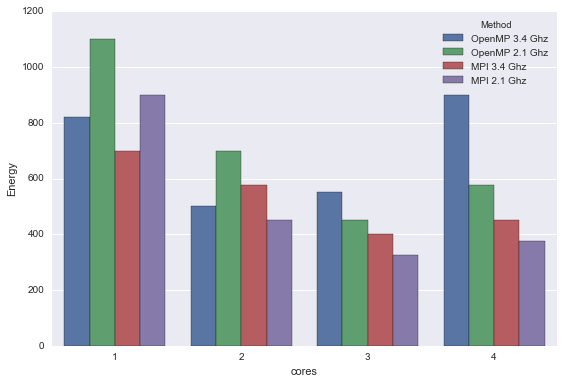

In [2]:
df = pd.DataFrame([
    ["OpenMP 3.4 Ghz", 1, 820],
    ["OpenMP 3.4 Ghz", 2, 500],
    ["OpenMP 3.4 Ghz", 3, 550],
    ["OpenMP 3.4 Ghz", 4, 900],
    ["OpenMP 2.1 Ghz", 1, 1100],
    ["OpenMP 2.1 Ghz", 2, 700],
    ["OpenMP 2.1 Ghz", 3, 450],
    ["OpenMP 2.1 Ghz", 4, 575],
    ["MPI 3.4 Ghz", 1, 700],
    ["MPI 3.4 Ghz", 2, 575],
    ["MPI 3.4 Ghz", 3, 400],
    ["MPI 3.4 Ghz", 4, 450],
    ["MPI 2.1 Ghz", 1, 900],
    ["MPI 2.1 Ghz", 2, 450],
    ["MPI 2.1 Ghz", 3, 325],
    ["MPI 2.1 Ghz", 4, 375]],
    columns=["Method", "cores", "Energy"])
sns.barplot(x="cores", y="Energy", hue="Method", data=df)
plt.ylabel("Energy")
plt.savefig("output/report/result_agg_state.pdf")

df

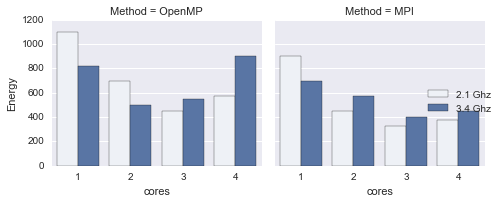

In [3]:
if "Freq" not in df:
    df["Freq"] = df["Method"].apply(lambda x: x.split(" ", 1)[1])
    df["Method"]= df["Method"].apply(lambda x: x.split()[0])

g = sns.FacetGrid(
        df,
        col="Method")

# Create the bar plot on each subplot
g.map(sns.barplot, "cores", "Energy", "Freq", hue_order=["2.1 Ghz", "3.4 Ghz"]).add_legend()

plt.savefig("output/report/result_agg_two.pdf")

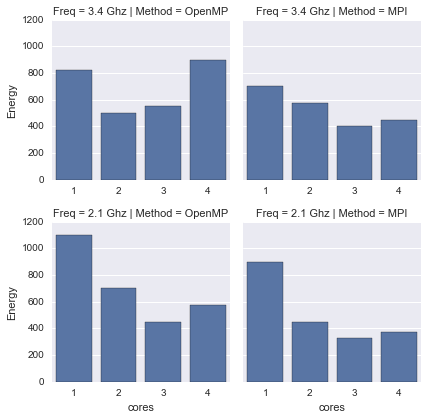

In [4]:
g = sns.FacetGrid(
        df,
        col="Method",
        row="Freq",
        sharex=False)

# Create the bar plot on each subplot
g.map(sns.barplot, "cores", "Energy").add_legend()
plt.savefig("output/report/result_agg_multiples.pdf")

['data/AdeptDataForPatrick/multisample/1/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5', 'data/AdeptDataForPatrick/multisample/2/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5', 'data/AdeptDataForPatrick/multisample/3/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5']


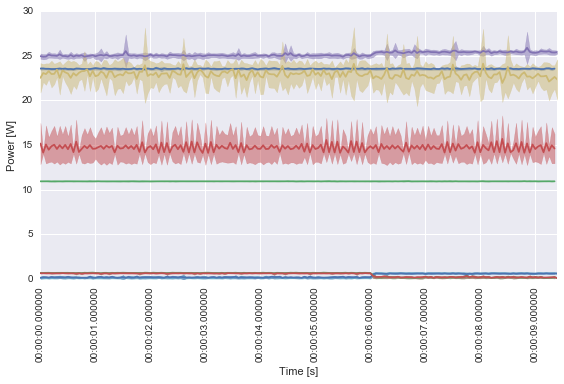

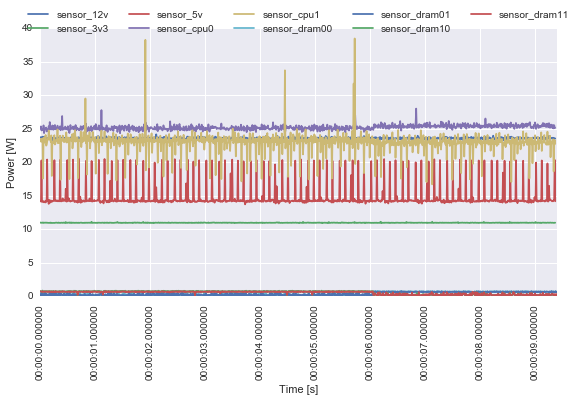

In [5]:
from glob import glob
import powervisualisation as pv

files = glob("data/AdeptDataForPatrick/multisample/*/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5")
print files
MS = pv.Multisample(files)
MS.plot()
plt.savefig("output/report/result_multisample1.pdf")

# single file for comparisoin
T = pv.Trace(files[0])
T.plot()
plt.savefig("output/report/result_multisample1_comp.pdf")

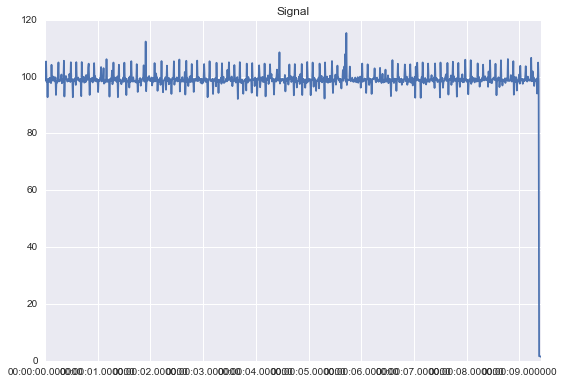

In [6]:
T.power_spectrum()